In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
client = MongoClient('mongodb://localhost:27017/')

In [3]:
# Create the 'energy_data' database and collection 
db = client['energy_data']
collection = db['fossil_carbon_renewable']

In [4]:
# Load the csv file using pandas
file_path = r"World Energy Consumption - Kaggle\World Energy Consumption.csv"
wec_full_df = pd.read_csv(file_path)

# Display the DataFrame to verify the data
wec_full_df.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [5]:
# total rows  
wec_full_df.count()

country                   22012
year                      22012
iso_code                  16512
population                18123
gdp                       11113
                          ...  
wind_elec_per_capita       7065
wind_electricity           7996
wind_energy_per_capita     4065
wind_share_elec            6886
wind_share_energy          4101
Length: 129, dtype: int64

In [6]:
# Inspect the columns 
wec_full_df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=129)

In [7]:
# Check for null values in the DataFrame
print("Null values per column:")
print(wec_full_df.isnull().sum())

Null values per column:
country                       0
year                          0
iso_code                   5500
population                 3889
gdp                       10899
                          ...  
wind_elec_per_capita      14947
wind_electricity          14016
wind_energy_per_capita    17947
wind_share_elec           15126
wind_share_energy         17911
Length: 129, dtype: int64


In [8]:
# Remove rows with null values
wec_cleaned_df = wec_full_df.dropna()  # Removes any rows with null values
print("DataFrame after removing rows with null values:")
wec_cleaned_df.head(10)

DataFrame after removing rows with null values:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160
1076,Argentina,2016,ARG,43668236.0,8.283729e+11,5.989,0.906,367.251,16.037,24.503,...,0.007,0.004,-7.749,-0.133,1.465,12.366,0.54,33.555,0.387,0.148
2966,Brazil,2013,BRA,201721776.0,3.112906e+12,16.904,24.974,856.203,172.715,194.674,...,0.000,0.000,30.215,4.075,17.922,32.619,6.58,88.845,1.168,0.516
2967,Brazil,2014,BRA,203459648.0,3.128573e+12,9.678,16.715,931.044,189.430,221.911,...,0.003,0.001,85.683,15.157,33.079,60.012,12.21,162.581,2.098,0.928
2968,Brazil,2015,BRA,205188208.0,3.270706e+12,16.967,32.141,1079.843,221.571,231.690,...,0.010,0.005,77.111,25.159,58.237,104.636,21.47,283.824,3.756,1.656
2969,Brazil,2016,BRA,206859584.0,2.889037e+12,-9.000,-19.942,974.715,201.629,237.552,...,0.014,0.007,54.857,31.414,89.651,160.689,33.24,433.390,5.817,2.612


In [9]:
#total rows after removing nulls
wec_cleaned_df.count()

country                   194
year                      194
iso_code                  194
population                194
gdp                       194
                         ... 
wind_elec_per_capita      194
wind_electricity          194
wind_energy_per_capita    194
wind_share_elec           194
wind_share_energy         194
Length: 129, dtype: int64

In [10]:
# Remove duplicate rows based on all columns 
wec_drop_dupes_df = wec_cleaned_df.drop_duplicates()  
print("DataFrame after removing duplicates:")
wec_drop_dupes_df.head()

DataFrame after removing duplicates:


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,46.423,2.750,208.889,8.673,32.273,...,0.000,0.000,4.887,0.003,0.073,1.445,0.06,1.767,0.049,0.008
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,19.876,1.724,247.831,10.397,33.133,...,0.008,0.002,1290.953,0.941,1.014,19.546,0.82,24.174,0.637,0.107
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,14.478,1.505,280.795,11.902,35.387,...,0.008,0.004,22.574,0.221,1.236,23.827,1.01,29.149,0.763,0.126
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,16.710,1.989,324.379,13.891,32.692,...,0.015,0.004,36.646,0.443,1.678,14.478,0.62,39.190,0.470,0.171
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,8.925,1.240,349.792,15.131,33.058,...,0.007,0.004,-4.222,-0.080,1.598,13.639,0.59,36.938,0.428,0.160


In [11]:
# Keep specific columns from the DataFrame
columns_to_remove = ['biofuel_cons_change_pct',
'biofuel_cons_change_twh',
'biofuel_cons_per_capita',
'biofuel_consumption',
'biofuel_elec_per_capita',
'biofuel_electricity',
'biofuel_share_elec',
'biofuel_share_energy',
'carbon_intensity_elec',
'coal_cons_change_pct',
'coal_cons_change_twh',
'coal_cons_per_capita',
'coal_consumption',
'coal_elec_per_capita',
'coal_electricity',
'coal_prod_change_pct',
'coal_prod_change_twh',
'coal_prod_per_capita',
'coal_production',
'coal_share_elec',
'coal_share_energy',
'electricity_demand',
'electricity_generation',
'electricity_share_energy',
'gas_cons_change_pct',
'gas_cons_change_twh',
'gas_consumption',
'gas_elec_per_capita',
'gas_electricity',
'gas_energy_per_capita',
'gas_prod_change_pct',
'gas_prod_change_twh',
'gas_prod_per_capita',
'gas_production',
'gas_share_elec',
'gas_share_energy',
'greenhouse_gas_emissions',
'hydro_cons_change_pct',
'hydro_cons_change_twh',
'hydro_consumption',
'hydro_elec_per_capita',
'hydro_electricity',
'hydro_energy_per_capita',
'hydro_share_elec',
'hydro_share_energy',
'net_elec_imports',
'net_elec_imports_share_demand',
'nuclear_cons_change_pct',
'nuclear_cons_change_twh',
'nuclear_consumption',
'nuclear_elec_per_capita',
'nuclear_electricity',
'nuclear_energy_per_capita',
'nuclear_share_elec',
'nuclear_share_energy',
'oil_cons_change_pct',
'oil_cons_change_twh',
'oil_consumption',
'oil_elec_per_capita',
'oil_electricity',
'oil_energy_per_capita',
'oil_prod_change_pct',
'oil_prod_change_twh',
'oil_prod_per_capita',
'oil_production',
'oil_share_elec',
'oil_share_energy',
'solar_cons_change_pct',
'solar_cons_change_twh',
'solar_consumption',
'solar_elec_per_capita',
'solar_electricity',
'solar_energy_per_capita',
'solar_share_elec',
'solar_share_energy',
'wind_cons_change_pct',
'wind_cons_change_twh',
'wind_consumption',
'wind_elec_per_capita',
'wind_electricity',
'wind_energy_per_capita',
'wind_share_elec',
'wind_share_energy']  # Replace with the actual column names you want to remove

wec_frc_df = wec_drop_dupes_df.drop(columns=columns_to_remove)

#  Round numeric columns to 2 decimal places
wec_frc_df = wec_frc_df.round(2)

print("DataFrame after removing specific columns:")
wec_frc_df.head()


DataFrame after removing specific columns:


,country,year,iso_code,population,gdp,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,...,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy
1071,Argentina,2011,ARG,41520736.0,8.359705e+11,2.84,25.12,21894.87,1.09,4.09,...,2956.35,909.09,1.45,-3.76,99.22,781.06,32.43,2389.66,26.42,10.91
1072,Argentina,2012,ARG,41952364.0,8.274048e+11,3.81,34.62,22494.72,1.14,4.78,...,3067.53,943.71,0.28,-3.18,96.04,737.26,30.93,2289.24,24.04,10.18
1073,Argentina,2013,ARG,42388268.0,8.473051e+11,3.99,37.69,23152.59,1.16,3.25,...,3121.38,981.40,12.75,11.33,107.37,826.41,35.03,2532.99,26.48,10.94
1074,Argentina,2014,ARG,42824064.0,8.259815e+11,-0.16,-1.54,22881.01,1.19,-0.05,...,3077.94,979.86,3.76,0.80,108.17,802.59,34.37,2525.83,26.08,11.04
1075,Argentina,2015,ARG,43257064.0,8.478550e+11,1.74,17.08,23046.87,1.18,1.49,...,3185.38,996.94,2.35,0.43,108.60,785.30,33.97,2510.58,24.65,10.89


In [12]:
wec_frc_df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'energy_cons_change_pct', 'energy_cons_change_twh', 'energy_per_capita',
       'energy_per_gdp', 'fossil_cons_change_pct', 'fossil_cons_change_twh',
       'fossil_elec_per_capita', 'fossil_electricity',
       'fossil_energy_per_capita', 'fossil_fuel_consumption',
       'fossil_share_elec', 'fossil_share_energy',
       'low_carbon_cons_change_pct', 'low_carbon_cons_change_twh',
       'low_carbon_consumption', 'low_carbon_elec_per_capita',
       'low_carbon_electricity', 'low_carbon_energy_per_capita',
       'low_carbon_share_elec', 'low_carbon_share_energy',
       'other_renewable_consumption', 'other_renewable_electricity',
       'other_renewable_exc_biofuel_electricity',
       'other_renewables_cons_change_pct', 'other_renewables_cons_change_twh',
       'other_renewables_elec_per_capita',
       'other_renewables_elec_per_capita_exc_biofuel',
       'other_renewables_energy_per_capita', 'other_renewables_sha

In [13]:
# Iterate over the DataFrame rows and insert them into MongoDB
for index, row in wec_frc_df.iterrows():
    # Convert each row to a dictionary for MongoDB insertion
    collection.insert_one(row.to_dict())

print("Cleaned DataFrame inserted successfully into MongoDB!")



Cleaned DataFrame inserted successfully into MongoDB!


In [14]:
# Fetch the first 5 records from MongoDB and convert them to a DataFrame
records = list(collection.find()) 
wec_frc_mongo_df = pd.DataFrame(records)
#  Display the DataFrame containing the records
print("DataFrame containing the records from MongoDB:")
wec_frc_mongo_df.round(2)

DataFrame containing the records from MongoDB:


,_id,country,year,iso_code,population,gdp,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,...,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy
0,67119f0e8c3a6e6747b062d0,Argentina,2011,ARG,41520736.0,8.359705e+11,2.84,25.12,21894.87,1.09,...,2956.35,909.09,1.45,-3.76,99.22,781.06,32.43,2389.66,26.42,10.91
1,67119f0e8c3a6e6747b062d1,Argentina,2012,ARG,41952364.0,8.274048e+11,3.81,34.62,22494.72,1.14,...,3067.53,943.71,0.28,-3.18,96.04,737.26,30.93,2289.24,24.04,10.18
2,67119f0e8c3a6e6747b062d2,Argentina,2013,ARG,42388268.0,8.473051e+11,3.99,37.69,23152.59,1.16,...,3121.38,981.40,12.75,11.33,107.37,826.41,35.03,2532.99,26.48,10.94
3,67119f0e8c3a6e6747b062d3,Argentina,2014,ARG,42824064.0,8.259815e+11,-0.16,-1.54,22881.01,1.19,...,3077.94,979.86,3.76,0.80,108.17,802.59,34.37,2525.83,26.08,11.04
4,67119f0e8c3a6e6747b062d4,Argentina,2015,ARG,43257064.0,8.478550e+11,1.74,17.08,23046.87,1.18,...,3185.38,996.94,2.35,0.43,108.60,785.30,33.97,2510.58,24.65,10.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,67158d5a94cbce38c821d652,United States,2014,USA,322033952.0,1.648266e+13,1.04,268.47,80725.09,1.58,...,12719.19,25996.22,2.80,52.50,1888.08,1698.05,546.83,5862.98,13.35,7.26
578,67158d5a94cbce38c821d653,United States,2015,USA,324607776.0,1.690258e+13,-0.96,-249.19,79317.37,1.52,...,12581.31,25747.03,2.90,34.90,1922.98,1714.35,556.49,5924.01,13.63,7.47
579,67158d5a94cbce38c821d654,United States,2016,USA,327210208.0,1.716256e+13,-0.09,-23.88,78613.54,1.50,...,12492.15,25723.15,10.74,208.20,2131.18,1909.81,624.91,6513.20,15.29,8.28
580,67158d5a94cbce38c821d655,United States,2017,USA,329791232.0,1.759628e+13,0.37,95.88,78289.01,1.47,...,12287.50,25819.03,8.09,213.71,2344.90,2144.36,707.19,7110.25,17.45,9.08


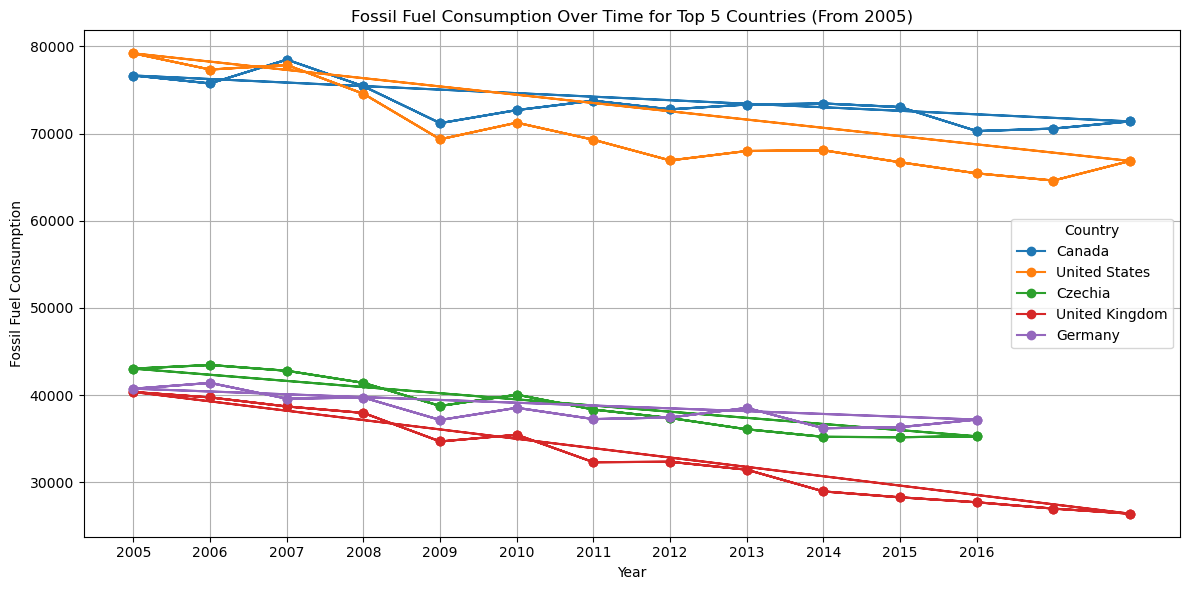

In [25]:
# Filter for the last 20 years (2005 to 2024)
filtered_df = wec_frc_mongo_df[(wec_frc_mongo_df['year'] >= 2005) & (wec_frc_mongo_df['year'] <= 2024)]

# Get the top 5 countries by total biofuel consumption
top_countries = filtered_df.groupby('country')['fossil_energy_per_capita'].sum().nlargest(5).index

# Filter DataFrame for the top countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries)]

# Plotting Biofuel Consumption
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['fossil_energy_per_capita'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Fossil Fuel Consumption')
plt.title('Fossil Fuel Consumption Over Time for Top 5 Countries (From 2005)')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


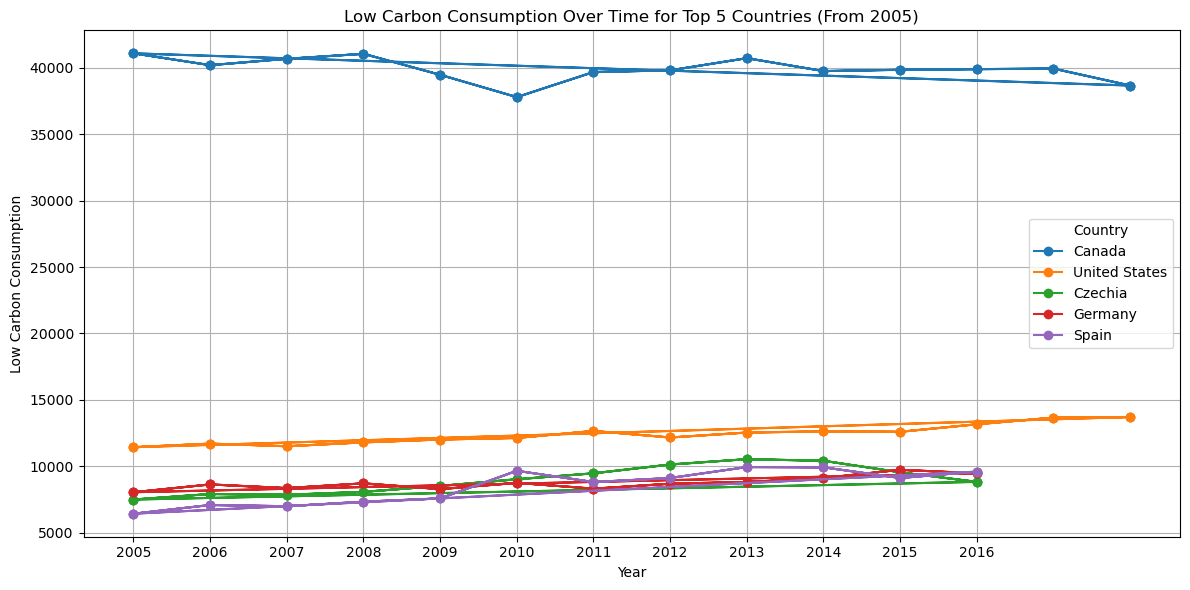

In [16]:
# Filter for the last 20 years (2005 to 2024)
filtered_df = wec_frc_mongo_df[(wec_frc_mongo_df['year'] >= 2005) & (wec_frc_mongo_df['year'] <= 2024)]

# Get the top 5 countries by total biofuel consumption
top_countries = filtered_df.groupby('country')['low_carbon_energy_per_capita'].sum().nlargest(5).index

# Filter DataFrame for the top countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries)]

# Plotting Biofuel Consumption
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['low_carbon_energy_per_capita'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Low Carbon Consumption')
plt.title('Low Carbon Consumption Over Time for Top 5 Countries (From 2005)')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()




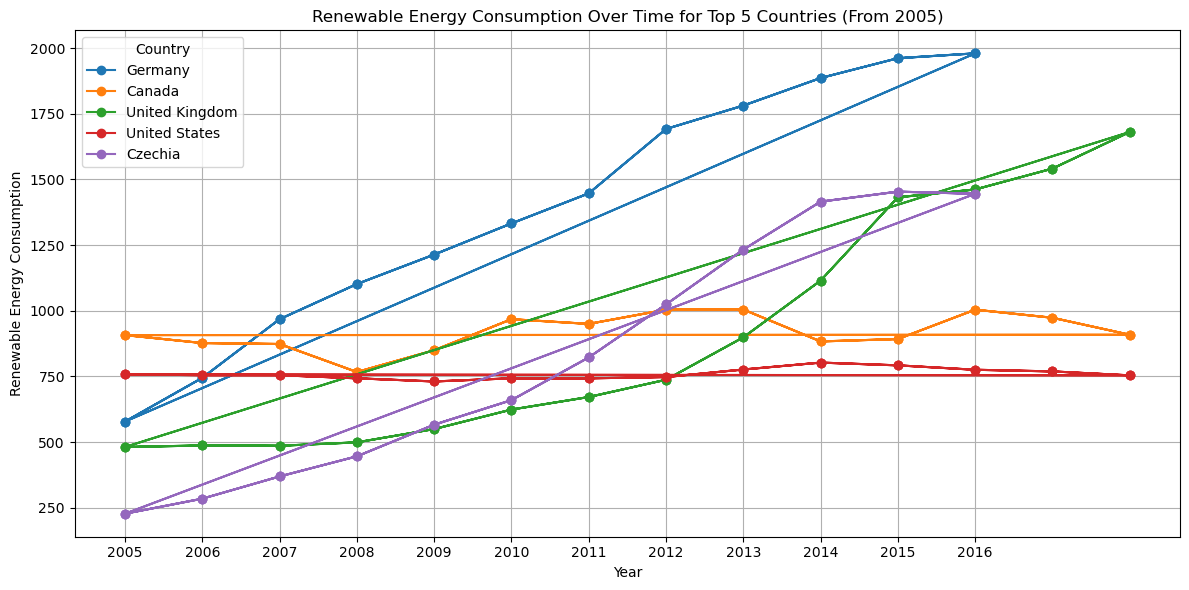

In [17]:
# Filter for the last 20 years (2005 to 2024)
filtered_df = wec_frc_mongo_df[(wec_frc_mongo_df['year'] >= 2005) & (wec_frc_mongo_df['year'] <= 2024)]

# Get the top 5 countries by total biofuel consumption
top_countries = filtered_df.groupby('country')['other_renewables_energy_per_capita'].sum().nlargest(5).index

# Filter DataFrame for the top countries
top_countries_data = filtered_df[filtered_df['country'].isin(top_countries)]

# Plotting Biofuel Consumption
plt.figure(figsize=(12, 6))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['country'] == country]
    plt.plot(country_data['year'], country_data['other_renewables_energy_per_capita'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Renewable Energy Consumption')
plt.title('Renewable Energy Consumption Over Time for Top 5 Countries (From 2005)')
plt.xticks(country_data['year'].unique())
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
filtered_df

,_id,country,year,iso_code,population,gdp,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,...,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy
0,67119f0e8c3a6e6747b062d0,Argentina,2011,ARG,41520736.0,8.359705e+11,2.84,25.12,21894.87,1.09,...,2956.35,909.09,1.45,-3.76,99.22,781.06,32.43,2389.66,26.42,10.91
1,67119f0e8c3a6e6747b062d1,Argentina,2012,ARG,41952364.0,8.274048e+11,3.81,34.62,22494.72,1.14,...,3067.53,943.71,0.28,-3.18,96.04,737.26,30.93,2289.24,24.04,10.18
2,67119f0e8c3a6e6747b062d2,Argentina,2013,ARG,42388268.0,8.473051e+11,3.99,37.69,23152.59,1.16,...,3121.38,981.40,12.75,11.33,107.37,826.41,35.03,2532.99,26.48,10.94
3,67119f0e8c3a6e6747b062d3,Argentina,2014,ARG,42824064.0,8.259815e+11,-0.16,-1.54,22881.01,1.19,...,3077.94,979.86,3.76,0.80,108.17,802.59,34.37,2525.83,26.08,11.04
4,67119f0e8c3a6e6747b062d4,Argentina,2015,ARG,43257064.0,8.478550e+11,1.74,17.08,23046.87,1.18,...,3185.38,996.94,2.35,0.43,108.60,785.30,33.97,2510.58,24.65,10.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577,67158d5a94cbce38c821d652,United States,2014,USA,322033952.0,1.648266e+13,1.04,268.47,80725.09,1.58,...,12719.19,25996.22,2.80,52.50,1888.08,1698.05,546.83,5862.98,13.35,7.26
578,67158d5a94cbce38c821d653,United States,2015,USA,324607776.0,1.690258e+13,-0.96,-249.19,79317.37,1.52,...,12581.31,25747.03,2.90,34.90,1922.98,1714.35,556.49,5924.01,13.63,7.47
579,67158d5a94cbce38c821d654,United States,2016,USA,327210208.0,1.716256e+13,-0.09,-23.88,78613.54,1.50,...,12492.15,25723.15,10.74,208.20,2131.18,1909.81,624.91,6513.20,15.29,8.28
580,67158d5a94cbce38c821d655,United States,2017,USA,329791232.0,1.759628e+13,0.37,95.88,78289.01,1.47,...,12287.50,25819.03,8.09,213.71,2344.90,2144.36,707.19,7110.25,17.45,9.08


In [21]:
from prophet import Prophet

for country, group in filtered_df.groupby('country'):
    # Ensure that the group has enough data points
    if len(group) >= 20:
        # Prepare the data for Prophet
        data = {
            'ds': pd.date_range(start='2024', periods=len(group)),  # Dates based on the length of the group
            'y': group["renewables_energy_per_capita"].values  # Values from the group
        }
        prophet_df = pd.DataFrame(data)

        # Now fit the model
        m = Prophet()
        m.fit(prophet_df)
        future = m.make_future_dataframe(periods=365)
        forecast = m.predict(future)
        
        # Optionally, you can store or plot the forecast for each country
        print(f"Forecast for {country}:")
        print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())  # Display the last few forecasted values

19:08:27 - cmdstanpy - INFO - Chain [1] start processing
19:08:31 - cmdstanpy - INFO - Chain [1] done processing
19:08:32 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Bulgaria:
            ds         yhat   yhat_lower   yhat_upper
381 2025-01-16  2904.064219 -1595.024609  7291.581567
382 2025-01-17  3090.544725 -1426.380622  7496.987167
383 2025-01-18  3664.104888  -869.763820  8088.068010
384 2025-01-19  3075.955020 -1473.719004  7517.684089
385 2025-01-20  2335.467676 -2229.766566  6795.193255


19:08:32 - cmdstanpy - INFO - Chain [1] done processing
19:08:32 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Canada:
            ds          yhat    yhat_lower    yhat_upper
402 2025-02-06  33236.183084  32519.962242  33913.988369
403 2025-02-07  32847.895267  32205.401486  33552.088457
404 2025-02-08  32142.391902  31416.693649  32814.071339
405 2025-02-09  32475.620123  31799.774649  33161.509788
406 2025-02-10  33294.704457  32600.532890  34006.335343


19:08:33 - cmdstanpy - INFO - Chain [1] done processing


Forecast for Czechia:
            ds          yhat    yhat_lower    yhat_upper
396 2025-01-31  12019.046393  10976.031856  13000.828487
397 2025-02-01  11724.428958  10741.787604  12720.744219
398 2025-02-02  11951.527849  10962.733258  12945.981417
399 2025-02-03  11936.137979  10953.917144  12933.353681
400 2025-02-04  12046.731238  11078.323518  13003.098818


19:08:33 - cmdstanpy - INFO - Chain [1] start processing
19:08:33 - cmdstanpy - INFO - Chain [1] done processing
19:08:34 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Germany:
            ds          yhat    yhat_lower    yhat_upper
396 2025-01-31  22004.050247  20363.831723  23690.227794
397 2025-02-01  21537.677585  19835.121763  23212.405297
398 2025-02-02  21994.765411  20396.573019  23738.651723
399 2025-02-03  22055.451030  20376.066154  23793.954277
400 2025-02-04  22182.724601  20531.010354  23779.667914


19:08:34 - cmdstanpy - INFO - Chain [1] done processing
19:08:34 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Hungary:
            ds         yhat   yhat_lower   yhat_upper
384 2025-01-19  1910.457082  1833.193420  1996.681161
385 2025-01-20  1959.147568  1879.963731  2035.024524
386 2025-01-21  1945.599574  1868.091916  2025.604732
387 2025-01-22  1900.253956  1818.350476  1983.504822
388 2025-01-23  1837.534164  1756.436536  1918.140605


19:08:35 - cmdstanpy - INFO - Chain [1] done processing
19:08:35 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Japan:
            ds         yhat   yhat_lower   yhat_upper
387 2025-01-22  7456.120405  7071.048413  7854.294817
388 2025-01-23  7716.377308  7312.325960  8118.848677
389 2025-01-24  7467.819013  7094.050621  7824.516392
390 2025-01-25  7665.045684  7272.392435  8039.333129
391 2025-01-26  7483.324424  7106.292572  7912.087089


19:08:35 - cmdstanpy - INFO - Chain [1] done processing
19:08:36 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Mexico:
            ds         yhat   yhat_lower   yhat_upper
402 2025-02-06  1408.367013  1307.469292  1502.784514
403 2025-02-07  1248.206706  1148.969782  1349.864223
404 2025-02-08  1399.293509  1300.433599  1490.330399
405 2025-02-09  1413.400489  1321.008484  1514.501470
406 2025-02-10  1259.311472  1163.911891  1352.589769


19:08:36 - cmdstanpy - INFO - Chain [1] done processing
19:08:36 - cmdstanpy - INFO - Chain [1] start processing


Forecast for Romania:
            ds          yhat    yhat_lower    yhat_upper
387 2025-01-22  11472.245817  10742.444675  12201.047058
388 2025-01-23  11619.158107  10938.258957  12277.456930
389 2025-01-24  11430.402553  10697.536534  12136.346230
390 2025-01-25  11580.261440  10901.217796  12318.981448
391 2025-01-26  11672.317107  10969.059818  12368.210124


19:08:37 - cmdstanpy - INFO - Chain [1] done processing
19:08:37 - cmdstanpy - INFO - Chain [1] start processing


Forecast for South Africa:
            ds        yhat  yhat_lower   yhat_upper
396 2025-01-31  957.511008  842.091492  1076.031055
397 2025-02-01  895.993278  775.693840  1012.144704
398 2025-02-02  943.171779  824.522629  1070.098840
399 2025-02-03  951.409035  832.644145  1066.480393
400 2025-02-04  935.124017  818.288230  1052.677992


19:08:37 - cmdstanpy - INFO - Chain [1] done processing


Forecast for Spain:
            ds          yhat    yhat_lower    yhat_upper
396 2025-01-31  20568.794714  19030.376151  22081.425266
397 2025-02-01  20253.713453  18662.172142  21864.786646
398 2025-02-02  20350.609975  18756.129354  21962.007472
399 2025-02-03  20353.873699  18710.094528  21969.440487
400 2025-02-04  20752.134385  19183.033760  22372.509877


19:08:38 - cmdstanpy - INFO - Chain [1] start processing
19:08:38 - cmdstanpy - INFO - Chain [1] done processing
19:08:39 - cmdstanpy - INFO - Chain [1] start processing


Forecast for United Kingdom:
            ds          yhat    yhat_lower    yhat_upper
402 2025-02-06  13260.647318  11890.979300  14664.742454
403 2025-02-07  13328.114199  11924.516296  14764.877954
404 2025-02-08  13669.197898  12161.026214  15142.903502
405 2025-02-09  14098.774199  12677.856813  15498.261362
406 2025-02-10  12391.154505  10952.692116  13764.399913


19:08:39 - cmdstanpy - INFO - Chain [1] done processing


Forecast for United States:
            ds          yhat    yhat_lower    yhat_upper
402 2025-02-06  13246.852778  12161.421617  14346.815714
403 2025-02-07  13740.959455  12655.068948  14838.487116
404 2025-02-08  14115.656367  13063.244956  15213.916030
405 2025-02-09  14564.372789  13517.232953  15606.373925
406 2025-02-10  12908.790086  11757.553535  13941.540197


In [20]:

# Step 1: Calculate average consumption per country
avg_consumption = filtered_df.groupby('country').agg({
    'fossil_fuel_consumption': 'mean',
    'wind_consumption': 'mean'
}).reset_index()

# Step 2: Get top 5 countries by average biofuel consumption
top_5_countries = avg_consumption.nlargest(10, 'fossil_fuel_consumption')

# Step 3: Set the bar width and position
bar_width = 0.35
x = range(len(top_5_countries))

# rotate x-axis labels
plt.figure(figsize=(10, 6))
plt.bar(x, top_5_countries['fossil_fuel_consumption'], width=bar_width, label='Fossil Fuel Consumption', color='tab:blue', align='center')
plt.bar([p + bar_width for p in x], top_5_countries['wind_consumption'], width=bar_width, label='Wind Consumption (TWh)', color='tab:orange', align='center')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average Consumption (TWh)')
plt.title('Average Fossil Fuel and Wind Consumption by Top 5 Countries')

# Adjust the x-axis ticks to avoid overlap
plt.xticks([p + bar_width / 2 for p in x], top_5_countries['country'], rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()


KeyError: "Column(s) ['wind_consumption'] do not exist"

In [ ]:

# Filter the DataFrame for the selected countries
selected_countries = ['Singapore', 'United States', 'United Kingdom', 'Germany']
wec_filtered_df = wec_filtered_df[wec_filtered_df['country'].isin(selected_countries)]

#  Group by country and calculate the average for each column of interest
avg_electricity = df_filtered.groupby('country').agg({
    'electricity_demand': 'mean',
    'electricity_generation': 'mean',
    'electricity_share_energy': 'mean'
}).reset_index()

#  Set the bar width and positions
bar_width = 0.25
x = np.arange(len(avg_electricity))

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, avg_electricity['electricity_demand'], width=bar_width, label='Electricity Demand', color='tab:blue')
plt.bar(x + bar_width, avg_electricity['electricity_generation'], width=bar_width, label='Electricity Generation', color='tab:green')
plt.bar(x + 2 * bar_width, avg_electricity['electricity_share_energy'], width=bar_width, label='Electricity Share of Total Energy', color='tab:orange')

# Add labels, title, and customizations
plt.xlabel('Country')
plt.ylabel('Electricity (TWh)')
plt.title('Comparison of Electricity Demand, Generation, and Share by Country')
plt.xticks(x + bar_width, avg_electricity['country'])
plt.legend()

# Improve aesthetics
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()